# Exploratory Data Analysis
See what interesting trends exist in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from secom import data

%matplotlib inline

DATA_PATH = "../../data"

In [2]:
plt.rcParams['figure.figsize'] = (14.0, 10.0)

## Secom Labels Dataset

In [3]:
secom_labels = data.load_secom_labels(DATA_PATH, human_labels=True)

In [4]:
counts = secom_labels["s_label_target"].value_counts()

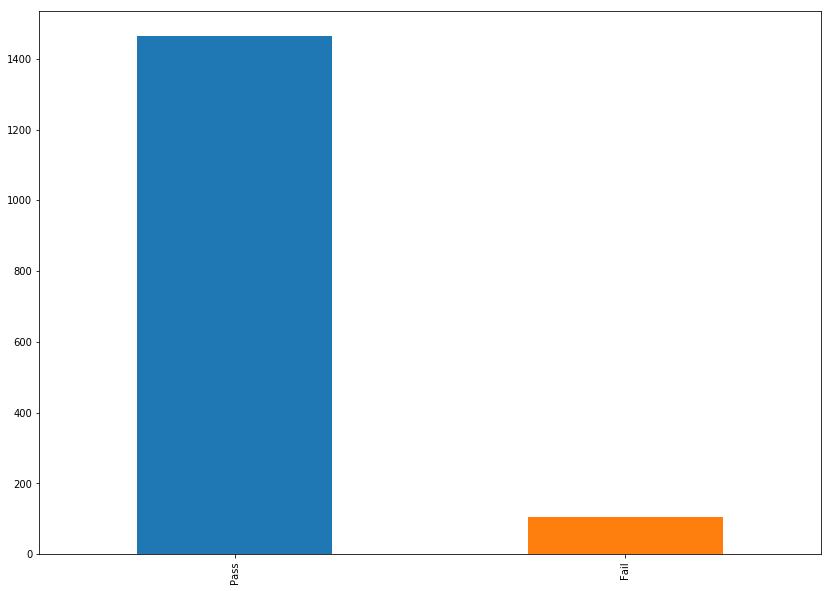

In [5]:
counts.plot("bar")

In [6]:
counts["Fail"] / counts.sum()

0.06636885768985322

## Check for correlations over time

In [7]:
secom_labels = data.load_secom_labels(DATA_PATH, feature_engineer=False, human_labels=True)

In [8]:
secom_labels["s_label_date"]= secom_labels["s_label_datetime"].dt.date

Plot Failure by day

In [9]:
failures_by_day = secom_labels.groupby(["s_label_target", "s_label_date"]).count()

In [10]:
failures_by_day.head()

s_label_datetime
s_label_target s_label_date                  
Fail           2008-01-08                   1
               2008-01-09                   1
               2008-01-10                   1
               2008-02-10                   5
               2008-03-09                   1

In [11]:
unstacked_failures_by_day = failures_by_day.unstack(-2).fillna(0)

In [12]:
unstacked_failures_by_day.columns = unstacked_failures_by_day.columns.droplevel(0,)

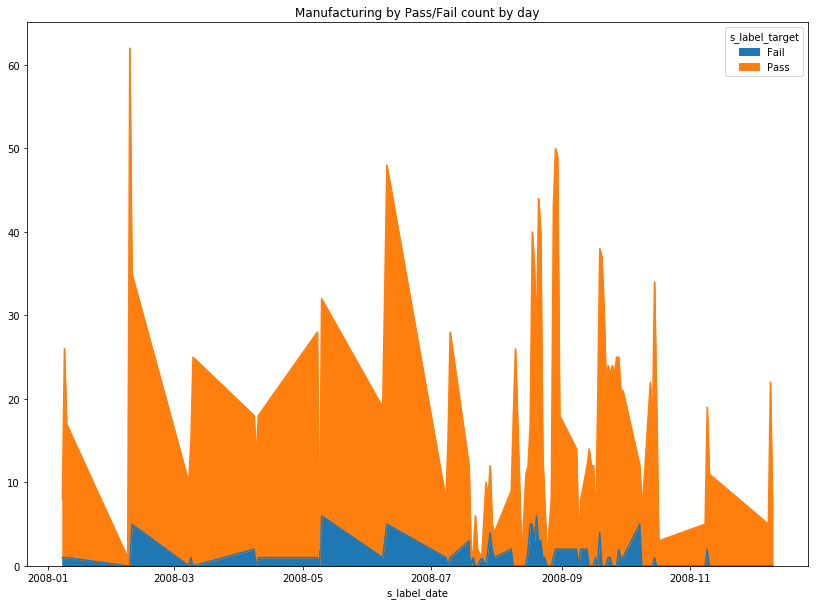

In [13]:
unstacked_failures_by_day.plot.area(title = "Manufacturing by Pass/Fail count by day")

## Plot Manufacturing Failure by week

In [14]:
secom_labels = data.load_secom_labels(DATA_PATH, feature_engineer=False, human_labels=True)
secom_labels["s_label_weekstart"]= secom_labels["s_label_datetime"].dt.to_period('W')
failures_by_week = secom_labels.groupby(["s_label_target", "s_label_weekstart"]).count()
unstacked_failures_by_week = failures_by_week.unstack(-2).fillna(0)
unstacked_failures_by_week.columns = unstacked_failures_by_week.columns.droplevel(0,)

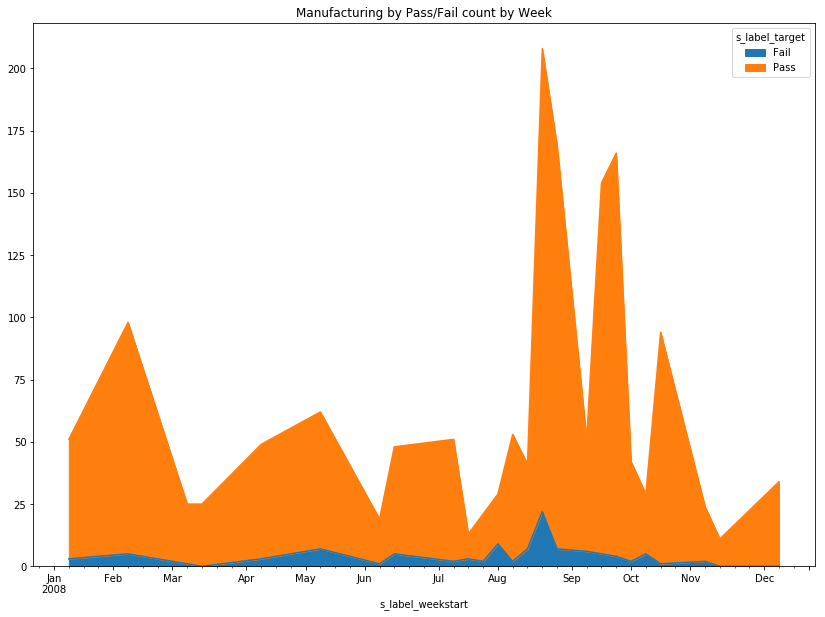

In [15]:
unstacked_failures_by_week.plot.area(title = "Manufacturing by Pass/Fail count by Week")

## Plot Manufacturing Failure by Month

In [16]:
secom_labels = data.load_secom_labels("../../data", feature_engineer=False, human_labels=True)
secom_labels["s_label_month"]= secom_labels["s_label_datetime"].dt.to_period('M')
failures_by_month = secom_labels.groupby(["s_label_target", "s_label_month"]).count()
unstacked_failures_by_month = failures_by_month.unstack(-2).fillna(0)
unstacked_failures_by_month.columns = unstacked_failures_by_month.columns.droplevel(0,)

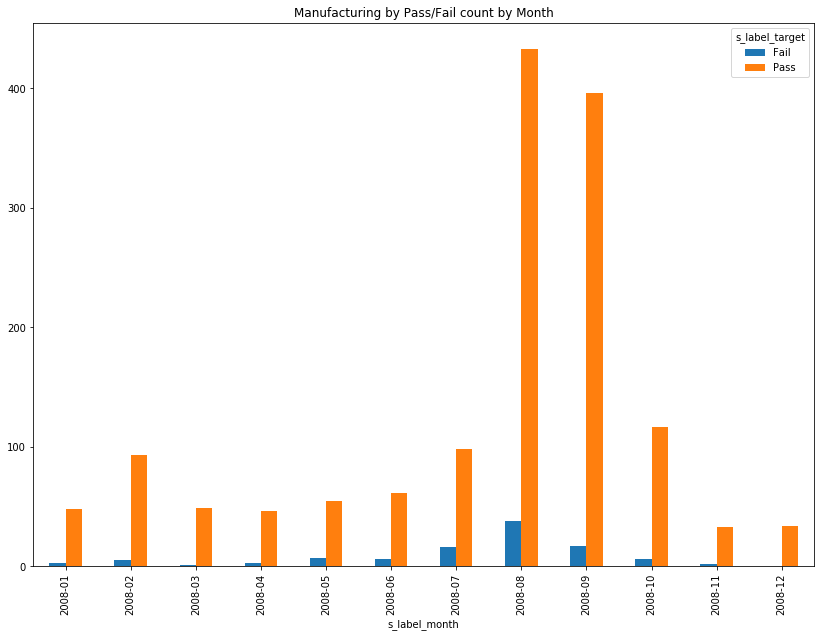

In [17]:
unstacked_failures_by_month.plot.bar(title = "Manufacturing by Pass/Fail count by Month")

## Check failure as a proportion of of month

In [18]:
unstacked_failures_by_month["Total"] = unstacked_failures_by_month.sum(axis=1)
unstacked_failures_by_month.head()

s_label_target,Fail,Pass,Total
s_label_month,,,
2008-01,3.0,48.0,51.0
2008-02,5.0,93.0,98.0
2008-03,1.0,49.0,50.0
2008-04,3.0,46.0,49.0
2008-05,7.0,55.0,62.0


Text(0, 0.5, 'Percentage Failure from Total')

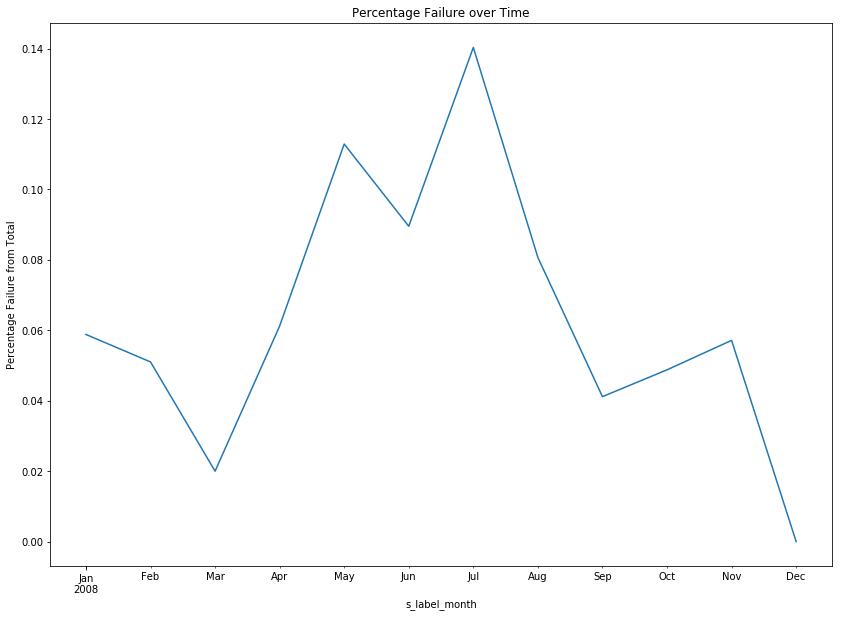

In [19]:
percentage_failure_per_month = unstacked_failures_by_month["Fail"] / unstacked_failures_by_month["Total"]
ax =percentage_failure_per_month.plot("line", title="Percentage Failure over Time")
ax.set_ylabel("Percentage Failure from Total")

# Check Failure per Supplier

In [20]:
secom_labels = data.load_secom_labels(DATA_PATH, human_labels=True, feature_engineer=False)
vendor_data = data.load_vendor_json(DATA_PATH, feature_engineer=False)
df = vendor_data.merge(secom_labels, left_index = True, right_index=True)

In [21]:
df.head()

,json_datetime,json_mat_vendor,json_part_vendor,json_sil_vendor,json_adhs_vendor,json_sop_vendor,s_label_target,s_label_datetime
0,2008-07-19 11:55:00,ddd,aaa,ddd,bbb,eee,Pass,2008-07-19 11:55:00
1,2008-07-19 12:32:00,eee,ccc,ddd,aaa,aaa,Pass,2008-07-19 12:32:00
2,2008-07-19 13:17:00,fff,aaa,eee,aaa,jjj,Fail,2008-07-19 13:17:00
3,2008-07-19 14:43:00,ccc,ccc,hhh,aaa,eee,Pass,2008-07-19 14:43:00
4,2008-07-19 15:22:00,ccc,bbb,aaa,bbb,iii,Pass,2008-07-19 15:22:00


In [22]:
def plot_failure_by_suppliertype(df, supplier_type):
    failure_by_supplier = df[[supplier_type, "s_label_target", "s_label_datetime"]].groupby([supplier_type, "s_label_target"]).count()
    failure_by_supplier = failure_by_supplier.unstack(-1).fillna(0)
    failure_by_supplier.columns = failure_by_supplier.columns.droplevel(0,)
    failure_by_supplier.plot(kind="bar", title = "Count of Pass and Fail by Supplier Type {}".format(supplier_type))
    
    return

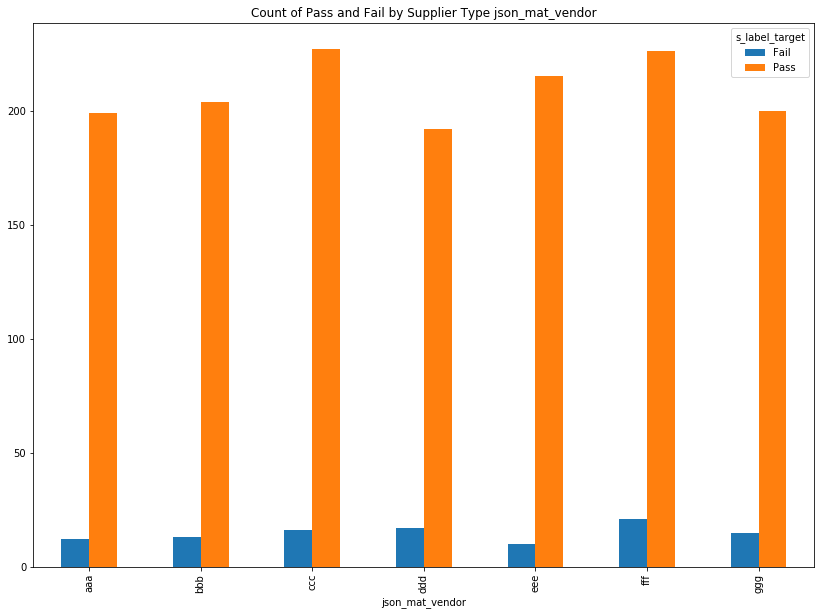

In [23]:
plot_failure_by_suppliertype(df, "json_mat_vendor")

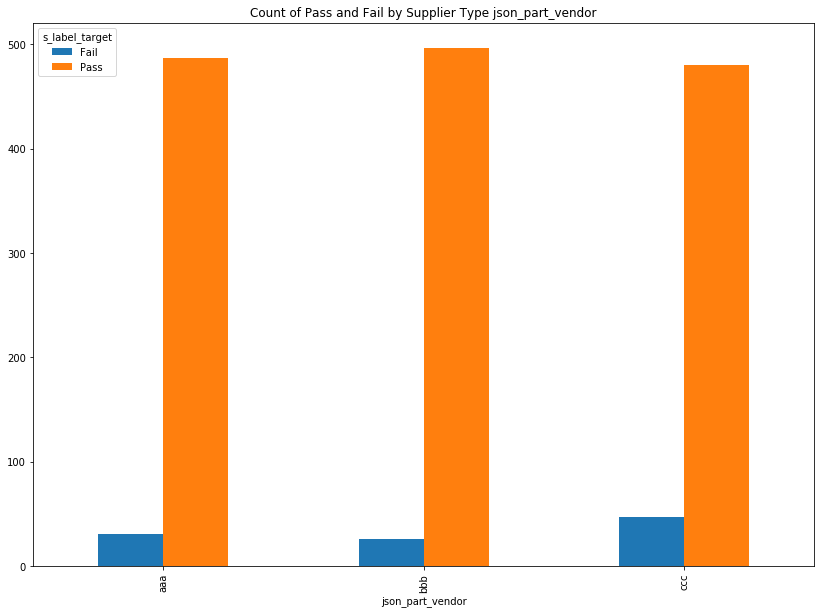

In [24]:
plot_failure_by_suppliertype(df, "json_part_vendor")

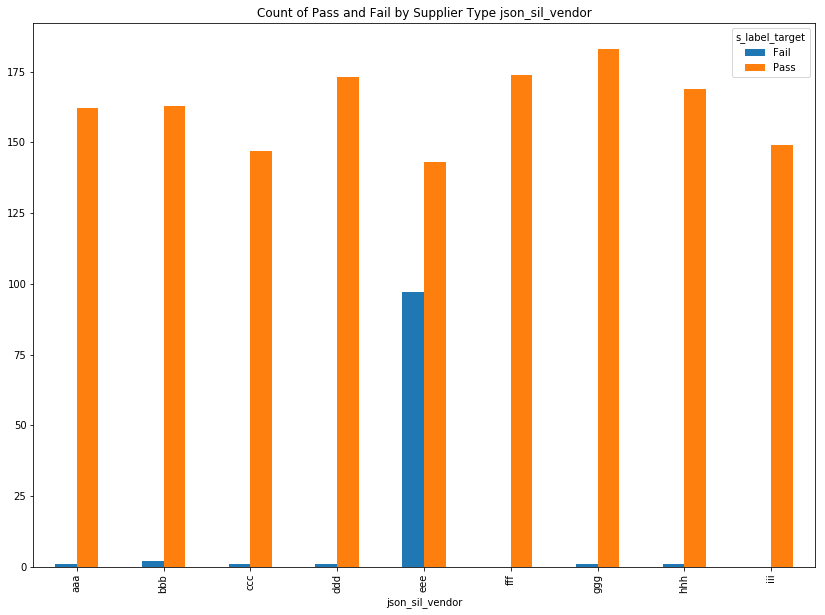

In [25]:
plot_failure_by_suppliertype(df, "json_sil_vendor")

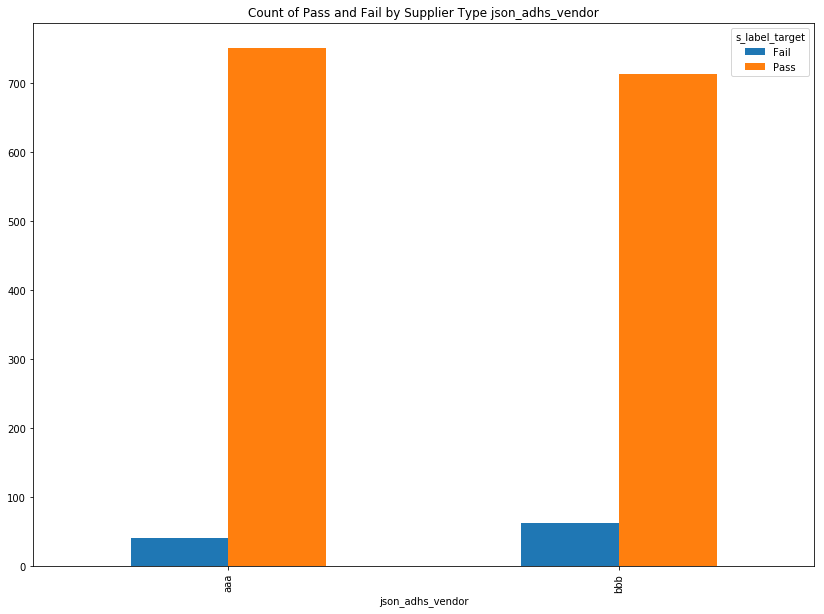

In [26]:
plot_failure_by_suppliertype(df, "json_adhs_vendor")

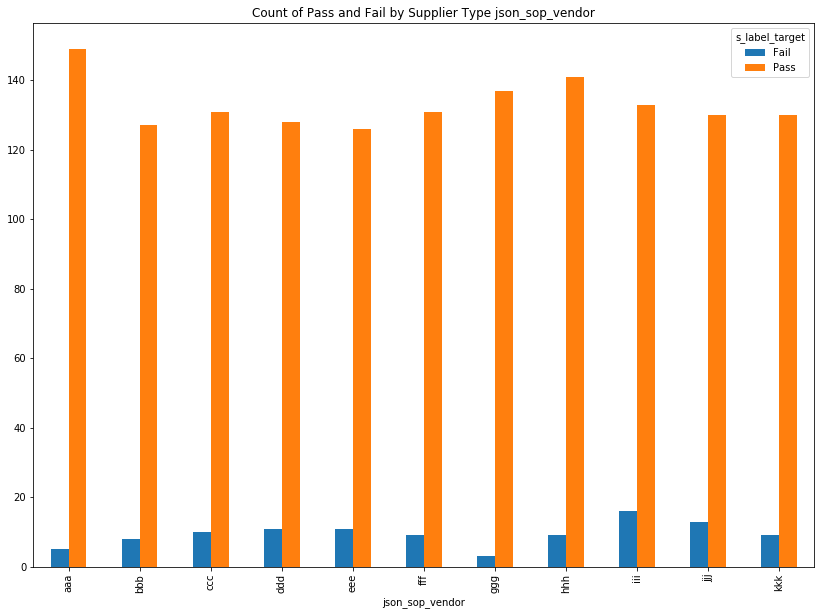

In [27]:
plot_failure_by_suppliertype(df, "json_sop_vendor")

### Investigate json_sil_vendor eee in further detail

In [29]:
df_eee = df[df["json_sil_vendor"] == "eee"]

df_eee["s_label_weekstart"]= df_eee["s_label_datetime"].dt.to_period('W')
failures_by_week_eee = df_eee[["s_label_target", "s_label_weekstart", "s_label_datetime"]].groupby(["s_label_target", "s_label_weekstart"]).count()
unstacked_failures_by_week_eee = failures_by_week_eee.unstack(-2).fillna(0)
unstacked_failures_by_week_eee.columns = unstacked_failures_by_week_eee.columns.droplevel(0,)

/home/canyon/miniconda3/envs/secom/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
unstacked_failures_by_week_eee

s_label_target,Fail,Pass
s_label_weekstart,,
2008-01-07/2008-01-13,3.0,7.0
2008-02-04/2008-02-10,4.0,6.0
2008-03-03/2008-03-09,1.0,1.0
2008-03-10/2008-03-16,0.0,2.0
2008-04-07/2008-04-13,3.0,5.0
2008-05-05/2008-05-11,7.0,5.0
2008-06-02/2008-06-08,1.0,1.0
2008-06-09/2008-06-15,4.0,5.0
2008-07-07/2008-07-13,2.0,5.0


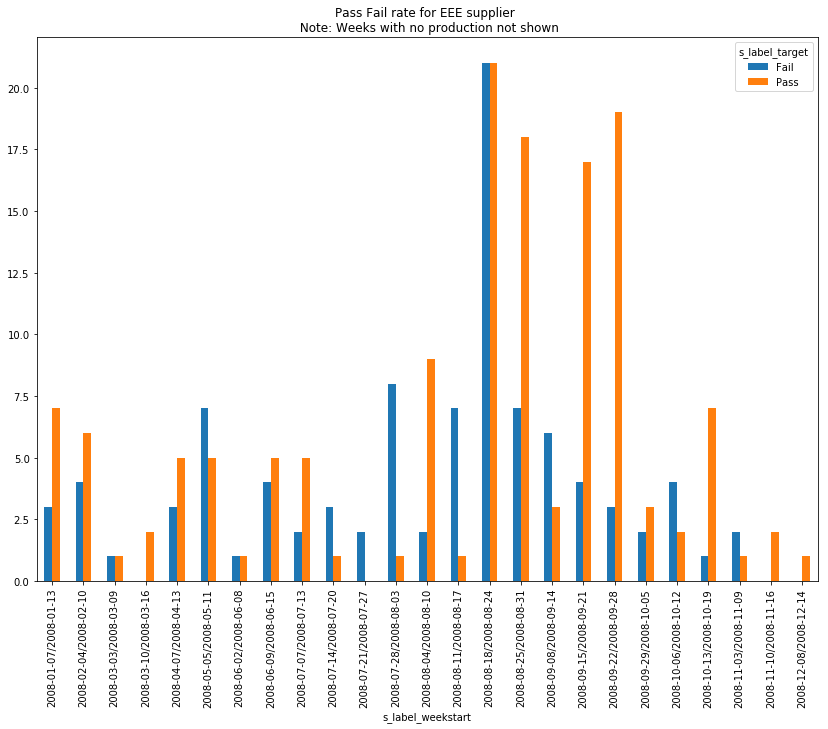

In [34]:
unstacked_failures_by_week_eee.plot(kind="bar", title = "Pass Fail rate for EEE supplier \n Note: Weeks with no production not shown" )